In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score # Optional, for another evaluation metric


In [2]:
np.random.seed(42)
num_customers = 200

In [5]:
data = {
    'Annual_Spending_USD': np.concatenate([
        np.random.normal(500, 100, 50),   # Low Spenders
        np.random.normal(2000, 300, 50),  # Medium Spenders
        np.random.normal(5000, 800, 50),  # High Spenders
        np.random.normal(1200, 200, 50)   # Another medium group
    ]),
    'Customer_Age': np.concatenate([
        np.random.normal(25, 5, 50),      # Young
        np.random.normal(40, 7, 50),      # Middle-aged
        np.random.normal(55, 8, 50),      # Older
        np.random.normal(30, 6, 50)       # Younger, mixed
    ])
}
df = pd.DataFrame(data)

In [6]:
# min 18 years old and min 100 USD spending
df['Annual_Spending_USD'] = df['Annual_Spending_USD'].apply(lambda x: max(x, 100))
df['Customer_Age'] = df['Customer_Age'].apply(lambda x: max(x, 18))


In [7]:
df.head()

,Annual_Spending_USD,Customer_Age
0,340.557234,28.784943
1,440.062498,20.389173
2,500.524370,29.348030
3,504.698059,31.778189
4,454.993453,27.067175


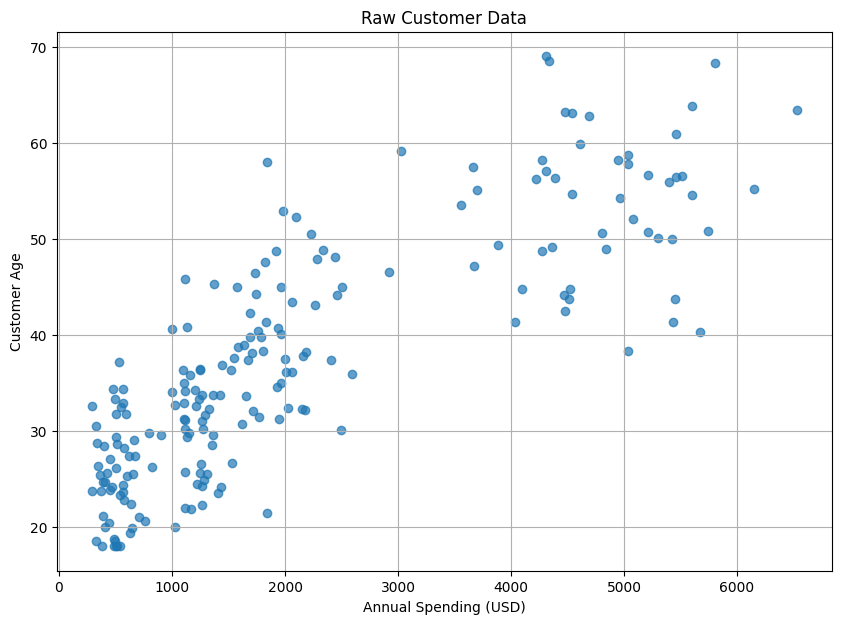

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Annual_Spending_USD'], df['Customer_Age'], alpha=0.7)
plt.xlabel("Annual Spending (USD)")
plt.ylabel("Customer Age")
plt.title("Raw Customer Data")
plt.grid(True)
plt.show()

In [9]:
# This is CRUCIAL for K-Means as it's distance-based.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df.head()

,Annual_Spending_USD,Customer_Age
0,-1.057991,-0.696754
1,-0.998786,-1.365616
2,-0.962812,-0.651895
3,-0.960328,-0.458292
4,-0.989902,-0.833603


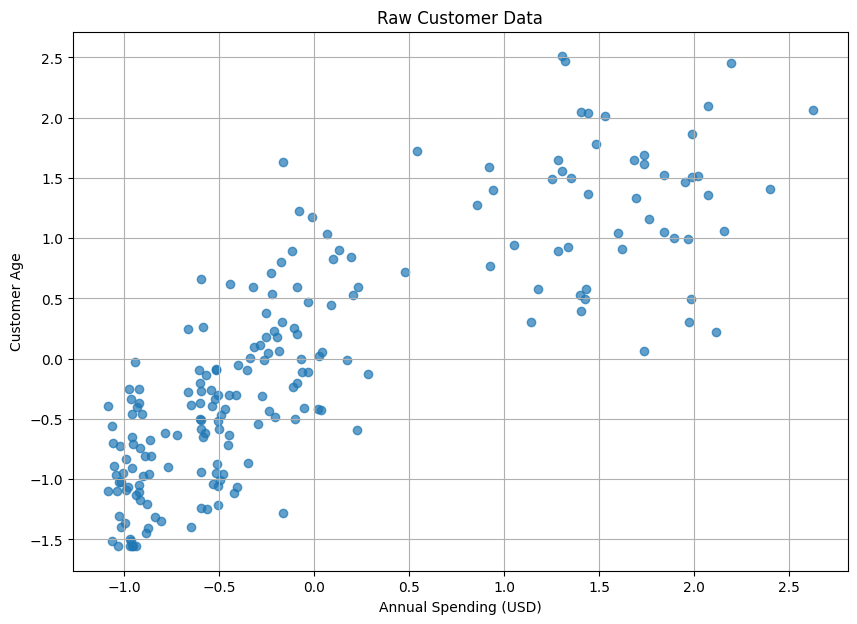

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_df['Annual_Spending_USD'], X_scaled_df['Customer_Age'], alpha=0.7)
plt.xlabel("Annual Spending (USD)")
plt.ylabel("Customer Age")
plt.title("Raw Customer Data")
plt.grid(True)
plt.show()

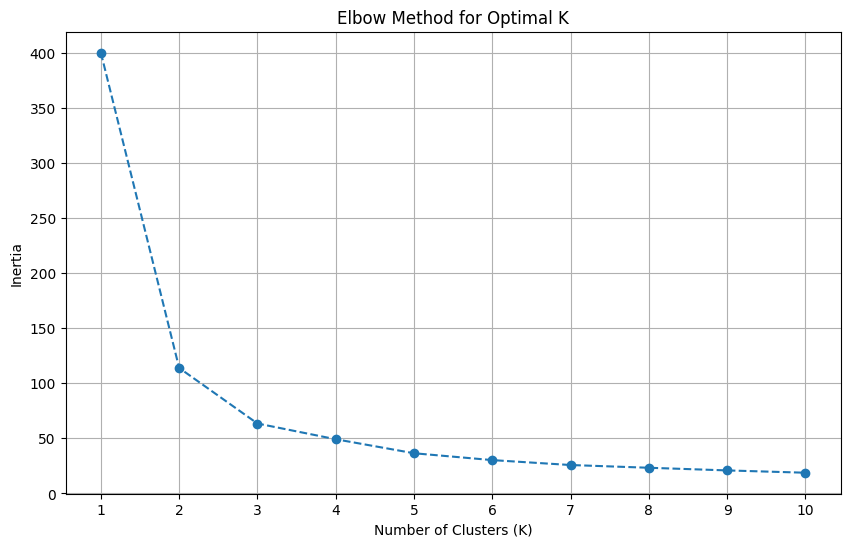

In [11]:
inertias = []
max_k = 10 # Test K from 1 to 10

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_) #  sum of squared distances between each data point 

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [15]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model again
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_
print(cluster_labels)

# Get the coordinates of the cluster centroids (in scaled space)
cluster_centroids_scaled = kmeans.cluster_centers_
print(cluster_centroids_scaled)

[2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 3 3 0 0 3 3 3 3 3 0 0 0 3 0 0 3 3 3 2 3 3 2 0 3
 0 0 0 3 3 3 3 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 0 2 3 0 0 2 0 2 0 3 0 0 2 0 0 2 0 0 2 0 0 0 2 2 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0]
[[-0.46659575 -0.29653247]
 [ 1.59124798  1.29339383]
 [-0.8374185  -1.1019239 ]
 [-0.06877299  0.58756359]]



Clusters assigned for K=4:
   Annual_Spending_USD  Customer_Age  Cluster
0           340.557234     28.784943        2
1           440.062498     20.389173        2
2           500.524370     29.348030        2
3           504.698059     31.778189        0
4           454.993453     27.067175        2

Cluster counts:
Cluster
0    62
1    50
2    58
3    30
Name: count, dtype: int64


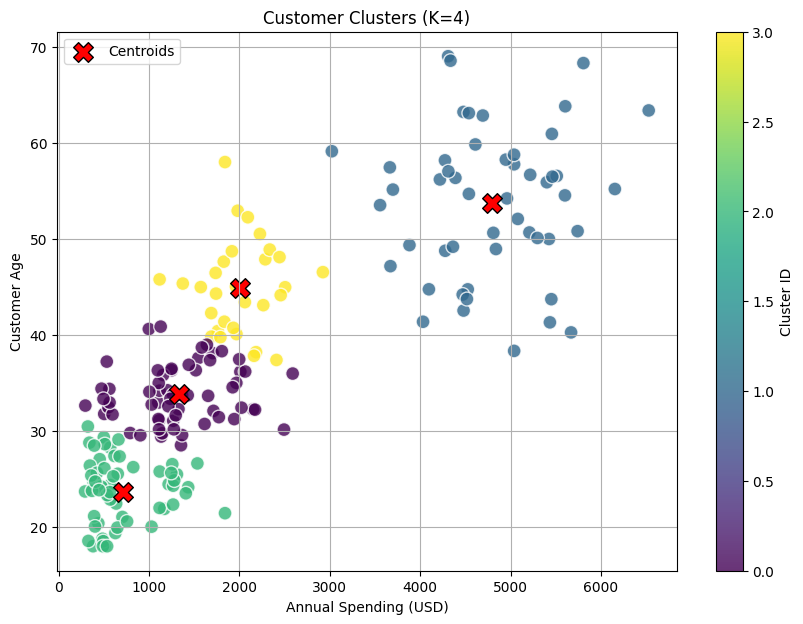

In [16]:

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

print(f"\nClusters assigned for K={optimal_k}:")
print(df.head())
print("\nCluster counts:")
print(df['Cluster'].value_counts().sort_index())

# --- 5. Visualize the Clusters ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Annual_Spending_USD'], df['Customer_Age'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.8, edgecolors='w')
# Plot centroids (need to inverse_transform them to original scale for plotting)

cluster_centroids_original_scale = scaler.inverse_transform(cluster_centroids_scaled)

plt.scatter(cluster_centroids_original_scale[:, 0], cluster_centroids_original_scale[:, 1],
            marker='X', s=200, color='red', label='Centroids', edgecolors='black')

plt.xlabel("Annual Spending (USD)")
plt.ylabel("Customer Age")
plt.title(f"Customer Clusters (K={optimal_k})")
plt.colorbar(scatter, label='Cluster ID')
plt.legend()
plt.grid(True)
plt.show()